In [1]:
import csv
import pandas as pd

import os

import nltk

from nltk.probability import FreqDist
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk import word_tokenize


In [2]:
#REMOVING STOP WORDS 

sw_nltk = stopwords.words('english')

example_tweet = open('JoeBidenTweets - JoeBidenTweets.csv', 'r').read()


example_tweet_stopless = [word for word in example_tweet.split() if word.lower() not in sw_nltk]
new_example_tweet = " ".join(example_tweet_stopless)


In [3]:
#PREPROCESSING 

punc = '''—!()-[]{};:'"“”\,<>./?@#$%^&*_~'''


def preprocess_tokenize(some_string):
    some_string = some_string.lower()
    for ele in some_string:
        if ele in punc:
            some_string = some_string.replace(ele, "")
    return some_string.split()


In [4]:
#TERMS GATHERED 

covid_associated_terms = 'covid, COVID-19,COVID19, disease, vaccination, mask, masks, hospitals, doctors, nurse, nurses,cdc, who, CDC, WHO, world health organization, center for disease control, sanitize, essential workers, social distancing, quarantine, isolation, pandemic, virus, vaccine, vaccinations, doctor, Fauci, scientist, scientists, Dr. Fauci'
xenophobia_derogatory_terms = 'china virus, chinese virus, Wuhan, China, kung flu,china,wuhan'
conspiracy_terms = 'lab, threat, danger, weapon, chloroquine, azithromycin, hydroxychloroquine, hoax, fake, ivermectin'
unity_terms = ' we, us, our, together, band, unite, solidarity, our country, our nation, thank'
election_terms = 'vote, ballot, election, votes, ballots, party, Democrat, democrat, Republican, republican, parties, nominate, nominee'


covid_associated_terms = covid_associated_terms.split(', ')
xenophobia_derogatory_terms = xenophobia_derogatory_terms.split(', ')
conspiracy_terms = conspiracy_terms.split(', ')
unity_terms = unity_terms.split(', ')
election_terms = election_terms.split(', ')


In [5]:
#CREATING LISTS AND COUNTS FOR TERMS 

covid_associated_terms_count = 0
xenophobia_derogatory_terms_count = 0
conspiracy_terms_count = 0
unity_terms_count = 0
election_terms_count = 0

covid_associated_terms_list = []
xenophobia_derogatory_terms_list = []
conspiracy_terms_list = []
unity_terms_list = []
all_terms_list = []
election_terms_list = []

new_example_tweet = preprocess_tokenize(new_example_tweet)

In [6]:
# HOW MUCH TWEETS AND WORDS THAT ARE BEING SEARCHED THROUGH

print("From 2,767 tweets and" + " " +
      str('{:,}'.format(len(new_example_tweet))) + " words")


From 2,767 tweets and 52,561 words


In [7]:
# SEARCH THROUGH TWEETS FOR CERTAIN TERMS 
for index in range(0, 1):
    for word in new_example_tweet:   
       # print(word)    
        if word in covid_associated_terms:
            covid_associated_terms_count += 1
            all_terms_list.append(word)
            if word not in covid_associated_terms_list:
                covid_associated_terms_list.append(word)
        elif word in xenophobia_derogatory_terms:
            xenophobia_derogatory_terms_count += 1
            all_terms_list.append(word)
            if word not in xenophobia_derogatory_terms_list:
                xenophobia_derogatory_terms_list.append(word)
        elif word in conspiracy_terms:
            conspiracy_terms_count += 1
            all_terms_list.append(word)
            if word not in conspiracy_terms_list:
                conspiracy_terms_list.append(word)
        elif word in unity_terms:
            unity_terms_count += 1
            all_terms_list.append(word)
            if word not in unity_terms_list:
                unity_terms_list.append(word)
        elif word in election_terms:
            election_terms_count += 1 
            all_terms_list.append(word)
            if word not in election_terms_list:
                election_terms_list.append(word)
        else:
            pass
        
print("In Joe Bidden Tweets for COVID Associated Terms, covid associated terms appeared " + str('{:,}'.format(
    covid_associated_terms_count)) + " " + "times" + " and these words  appeared " + str(covid_associated_terms_list) + '\n')

print("In Joe Bidden Tweets for Xenophobia Derogatory Terms, xenophobia derogatory terms appeared " +
      str('{:,}'.format(xenophobia_derogatory_terms_count)) + " " + "times" +'\n')

print("In Joe Bidden Tweets for Conspiracy Terms, conspiracy terms appeared " + str('{:,}'.format(
    conspiracy_terms_count)) + " " + "times" + " and these words  appeared " + str(conspiracy_terms_list) + '\n')

print("In Joe Bidden Tweets for Unity Terms, unity terms appeared " + str('{:,}'.format(
    unity_terms_count)) + " " + "times" + " and these words appeared " + str(unity_terms_list) + '\n')

print("In Joe Bidden Tweets for Election Terms, election  terms appeared " +
      str('{:,}'.format(election_terms_count)) + " " + "times" + " and these words appeared " + str(election_terms_list) + '\n')




In Joe Bidden Tweets for COVID Associated Terms, covid associated terms appeared 369 times and these words  appeared ['doctor', 'who', 'scientists', 'virus', 'pandemic', 'disease', 'vaccine', 'doctors', 'masks', 'hospitals', 'covid', 'nurse', 'mask', 'quarantine', 'vaccinations', 'scientist', 'vaccination']

In Joe Bidden Tweets for Xenophobia Derogatory Terms, xenophobia derogatory terms appeared 0 times

In Joe Bidden Tweets for Conspiracy Terms, conspiracy terms appeared 61 times and these words  appeared ['threat', 'danger', 'weapon', 'fake', 'hoax']

In Joe Bidden Tweets for Unity Terms, unity terms appeared 882 times and these words appeared ['us', 'thank', 'solidarity', 'together', 'unite', 'our']

In Joe Bidden Tweets for Election Terms, election  terms appeared 374 times and these words appeared ['election', 'vote', 'ballot', 'nominee', 'party', 'votes', 'republican', 'ballots', 'nominate', 'parties', 'democrat']



[('us', 412), ('together', 292), ('vote', 162), ('election', 118), ('thank', 111), ('pandemic', 109), ('virus', 87), ('mask', 52), ('threat', 50), ('unite', 44), ('ballot', 43), ('vaccine', 30), ('masks', 23), ('covid', 22), ('scientists', 20), ('our', 18), ('party', 18), ('nominee', 11), ('votes', 7), ('disease', 6), ('doctors', 6), ('solidarity', 5), ('nominate', 4), ('danger', 4), ('who', 4)]


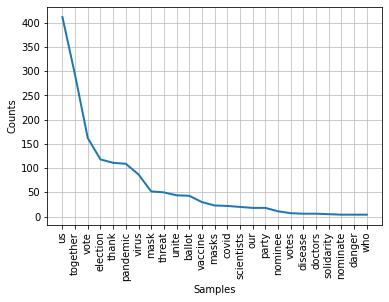

AxesSubplot(0.125,0.125;0.775x0.755)


In [8]:
#FREQUENCEY OF WORDS AND PLOTTED FOR ALL OF THE TERMS REMOVED FROM LIST 

print(FreqDist(all_terms_list).most_common(25))
print(FreqDist(all_terms_list).plot(25))

[('president', 652), ('trump', 642), ('donald', 498), ('need', 438), ('us', 412), ('get', 331), ('nation', 330), ('one', 324), ('people', 295), ('together', 292), ('american', 283), ('every', 278), ('country', 278), ('day', 267), ('make', 260), ('today', 243), ('time', 242), ('america', 225), ('help', 221), ('crisis', 208), ('back', 204), ('americans', 202), ('covid19', 197), ('it’s', 193), ('going', 191)]


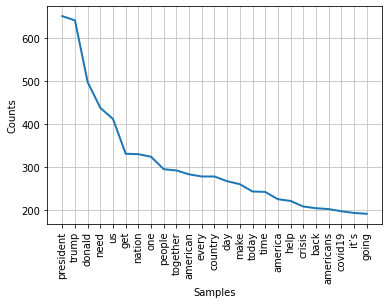

AxesSubplot(0.125,0.125;0.775x0.755)


In [9]:
#FREQUENCEY OF WORDS AND PLOTTED FROM ALL OF THE TWEETS

print(FreqDist(new_example_tweet).most_common(25))
print(FreqDist(new_example_tweet).plot(25))

In [10]:
#Sentiment Analysis
tweets_df = pd.read_csv('JoeBidenTweets - JoeBidenTweets.csv', header=None)

tweets_df = tweets_df.rename(columns={0: "Tweet"})
tweets_df_name_index = tweets_df.set_index('Tweet')

tweets_df["Tweet"].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

tweets_df["Subjectivity"] = tweets_df["Tweet"].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)
tweets_df

tweets_df["Polarity"] = tweets_df["Tweet"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
tweets_df

,Tweet,Subjectivity,Polarity
0,Our final fundraising deadline of 2019 is just...,0.475000,-0.075000
1,Every single human being deserves to be treate...,0.452381,-0.295238
2,With just over one month until the Iowa Caucus...,0.000000,0.000000
3,This election is about the soul of our nation ...,0.000000,0.000000
4,Every day that Donald Trump remains in the Whi...,0.075000,0.033333
...,...,...,...
2761,RT @WhiteHouse : We are currently facing four ...,0.300000,0.100000
2762,RT @POTUS : We don't have a second to waste wh...,0.166667,0.100000
2763,RT @POTUS : We will get this virus under contr...,0.000000,0.000000
2764,"RT @POTUS : This afternoon, I’ll be taking act...",0.250000,-0.075000


In [11]:
tweets_df.describe()

,Subjectivity,Polarity
count,2766.000000,2766.000000
mean,0.359956,0.116417
std,0.259007,0.242213
min,0.000000,-1.000000
25%,0.150000,0.000000
50%,0.374369,0.063194
75%,0.519444,0.250000
max,1.000000,1.000000


array([[<AxesSubplot:title={'center':'Subjectivity'}>,
        <AxesSubplot:title={'center':'Polarity'}>]], dtype=object)

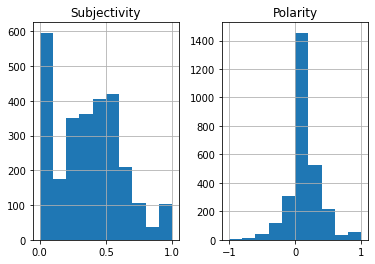

In [12]:
tweets_df.hist()